# Kaj so nevronske mreže


Nevronske mreže so bile narejene kot računalniški model delovanja možganov. Z njihovo pomočjo poizkušamo aproksimirati nelinearne funkcije.

Uporabljajo se pri avtonomni vožnji, diagnosticiranju bolezni, napovedovanju cen, napovedovanju 3D oblike proteinov, itd.

Nevronske mreže so zgrajene iz večih plasti medseboj povezanih nevronov, kjer ima vsak nevron določene parametre katere lahko spreminjamo. 

Začetna plast nevronov sprejme vhodne vrednosti - kot so slika okolice, kemična sestava molekule, itd. - jih spremeni glede na določeno funkcijo in svoje parametre ter te vrednosti posreduje naslednji plasti. Tako vrednosti potujejo do zadnje plasti, ki nam poda končno napoved - ali avto vidi sosednje avte ali ne, način kako se bo protein oblikoval, itd. Če so parametri nevronov pravilno izbrani potem so izhodne vrednosti nevronske mreže blizu resničnim vrednostim. 

Kako blizu smo resničnim vrednostim lahko matematično izračunamo. Dobljeno vrednost lahko nato uporabimo, da z njeno pomočjo posodobimo parametre nevronov in se tako bolj približamo resnični vrednosti. Na tak način se nevronska mreža uči.

Za začetek si poglejmo kako je sestavljen 1 nevron.

# Nevron

Nevron je sestavljen iz :
* vhodnih signalov (*angl.* **inputs**), 
* uteži (*angl.* **weights**),
* praga (*angl.* **bias**)

**Inputs** predstavljajo vrednosti, ki so posredovane v neuron. To so lahko značilke (teža, kvadratna površina stanovanja, barva pixla, itd..), lahko pa so vrednosti neuronov iz prednodnje plasti.

**Weights** so parametri, ki predstavljajo jakost posameznega input-a. Vsak input v nevron ima svoj specifičen weight.

**Bias** je dodaten parameter, specifičen za vsak nevron.

Tekom treniranja naše mreže je cilj spreminjati parametre nevronov, tako da, čim bolj natančno napovemo izhodne vrednosti.

Vrednost enega nevrona se izračuna po enačbi:


<div style="background: lightgreen">
$\Large o = \sum_{j=0}^{n}(i_j w_j) + b$

* $i_j$ je specifičen input
* $w_j$ je weight specifičnega inputa
* $b$   je bias nevrona
</div>

<hr>

Za primer bomo sprogramirali delovanje enega nevrona. 
* V nevron vstopajo 3 input vrednosti: 1,2,3
* Vsak input ima svoj specifični weight: 0.2, 0.8, -0.5
* Nevron ima svoj specifični bias: 2

![Nevron](images/01.PNG)

Izhodno vrednost dobimo po zgornji enačbi:

<div style="background: lightgreen">
$o = \sum_{j=0}^{n}(i_j w_j) + b = i_0 \cdot w_0 + i_1 \cdot w_1 + i_2 \cdot w_2 + b = 1 \cdot 0.2 + 2 \cdot 0.8 + 3 \cdot (-0.5) + 2 = 2.3$
</div>

In [ ]:
inputs = [1,2,3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

V primeru večih inputov nevron dobi dodatne weights - dodaten weight za vsak nov input. Bias ostane samo eden saj je le-ta specifičen za nevron.

![Nevron - 4 inputs](images/02.PNG)

<div style="background: lightgreen">
$o = \sum_{j=0}^{n}(i_j w_j) + b = i_0 \cdot w_0 + i_1 \cdot w_1 + i_2 \cdot w_2 + i_3 \cdot w_3 + b = 1 \cdot 0.2 + 2 \cdot 0.8 + 3 \cdot (-0.5) + 2.5 \cdot 1.0 + 2 = 4.8$
</div>

In [ ]:
inputs = [1,2,3,2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias
print(output)

<hr>

Za hitrejše računanje se uporablja matematične operacije nad tensorji.

Za izračun vrednosti neurona se lahko uporabi **dot product**:

<div style="background: lightgreen">
<b>Dot product:</b>

$\Large \vec{a}^{\,}\cdot \vec{b}^{\,} = [1,2,3]\cdot [2,3,4] = 1\cdot 2 + 2\cdot 3 + 3\cdot 4 = 20$
</div>

In [ ]:
# Primer računanja s tensorji za en neuron
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0


output = np.dot(weights, inputs) + bias

print(output)

# Plast nevronov


Nevronske mreže so večinoma sestavljene iz večih plasti (*angl.* **layer**). Plast je preprosto skupina neuronov.

V osnovi poznamo vhodno plast (*angl.* **input layer**), ki prejme značilke. Izhodno plast (*angl.* **output layer**), ki vrne napovedano vrednost. Ostale plasti so skrite plasti (*angl.* **hidden layer**). Če ima mreža več kot 1 skrito plast se imenuje **deep neural network**.

Za primer si poglejmo del nevronske mreže kjer imamo vhodno plast sestavljeno iz 4 nevronov, ki so nato povezani z naslednjo plastjo, ki ima 3 nevrone.

Vsak izmed štirih nevronov je povezan na vse nevrone naslednje plasti, kar pomeni, da imamo **dense layer**. Razlika med nevroni v isti plasti so njihove weights in bias.

![Dense layer](images/03.PNG)

In [ ]:
inputs = [1, 2, 3, 2.5]                
weights1 = [0.2, 0.8, -0.5, 1.0]       # uteži neurona1
weights2 = [0.5, -0.91, 0.26, -0.5]    # uteži neurona2
weights3 = [-0.26, -0.27, 0.17, 0.87]  # uteži neurona3

bias1 = 2    # bias neurona1
bias2 = 3    # bias neurona2
bias3 = 0.5  # bias neurona3

outputs = [
    # Output Neuron 1:
    inputs[0]*weights1[0] +
    inputs[1]*weights1[1] +
    inputs[2]*weights1[2] +
    inputs[3]*weights1[3] + bias1,

    # Output Neuron 2:
    inputs[0]*weights2[0] +
    inputs[1]*weights2[1] +
    inputs[2]*weights2[2] +
    inputs[3]*weights2[3] + bias2,

    # Output Neuron 3:
    inputs[0]*weights3[0] +
    inputs[1]*weights3[1] +
    inputs[2]*weights3[2] +
    inputs[3]*weights3[3] + bias3
]

print(outputs)

<hr>

Ista koda, zapisana z **numpy.dot()**.

In [ ]:
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

layer_outputs = np.dot(weights, inputs) + biases

print(layer_outputs)

<hr>

Sedaj dodamo še en dense layer 3eh nevronov. Inputs te so outputs prejšnje dense layer.

![2 Dense layers](images/04.PNG)

In [ ]:
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]

# Dense layer 1
weights = [[ 0.20,  0.80, -0.50,  1.00],
           [ 0.50, -0.91,  0.26, -0.50],
           [-0.26, -0.27,  0.17,  0.87]]
biases = [2.0, 3.0, 0.5]

# Dense layer 2
weights2 = [[ 0.10, -0.14,  0.50],
            [-0.50,  0.12, -0.33],
            [-0.44,  0.73, -0.13]]
biases2 = [-1, 2, -0.5]


layer1_outputs = np.dot(weights, inputs) + biases
layer2_outputs = np.dot(weights2, layer1_outputs) + biases2

print("Layer 1: ", layer1_outputs)
print("Layer 2: ", layer2_outputs)

<hr>

Kodo sedaj spremenimo v python class.

Weights parametre inicializiramo naključno.

Bias parametre inicializiramo na vrednost 0.

In [ ]:
'''
Koda je v CLEAN verziji
'''

import numpy as np
np.random.seed(2020)


class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_neurons, n_inputs)
        print("Weights: ")
        print(self.weights)
        self.biases = np.zeros(n_neurons)
        print("Bias: ")
        print(self.biases)

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(self.weights, inputs) + self.biases

inputs = [1.0, 2.0, 3.0, 2.5]

print("Creating DENSE 1")
dense1 = Layer_Dense(4, 3)
print("Creating DENSE 2")
dense2 = Layer_Dense(3, 3)

dense1.forward(inputs)
dense2.forward(dense1.output)

print("Dense 1 output: ")
print(dense1.output)
print("Dense 2 outut: ")
print(dense2.output)

<hr>

Neuronske mreže ne treniramo z vsakim vzorcem posebej, vendar jih treniramo z večimi vzorci naenkrat. Na tak način se zagotavlja, da se model ne prilagaja vsakemu vzorcu posebej ampak se prilagaja na več vzorcev naenkrat. Tako je model sposoben znanje posplošiti na še ne videne podatke in se izogibamo overfitting-u.

Dobra stran treniranja na večih vzorcih naenkrat je tudi zmožnost uporabljanja večih procesorjev kar dodatno pohitri čas učenja. Za ta namen se uporablja GPUs oziroma TPUs (tensor processing units).

Za primer vzemimo batch, kjer imamo 3 vzorce:
```python
inputs = [[1.0, 2.0, 3.0, 2.5],  # sample 1
          [2.0, 5.0, -1.0, 2.0], # sample 2
          [-1.5, 2.7, 3.3, -0.8]]# sample 3
```

In [ ]:
import numpy as np


inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

#layer_outputs = np.dot(np.array(inputs), np.array(weights)) + biases
#print(layer_outputs)

Sedaj dobimo error, saj se dimenzije inputs in weights ne poravnajo za izvedbo računanja.

Wights želimo v obliki:
```python
[[ 0.2 ,  0.5 , -0.26],
[ 0.8 , -0.91, -0.27],
[-0.5 ,  0.26,  0.17],
[ 1.  , -0.5 ,  0.87]]
```

Kjer je stolpec 1 weights nevrona 1, stolpec 2 weights nevrona 2, stolpec 3 weights nevrona 3.

Sedaj lahko uporabimo matrični račun:

![Matrix calculation](images/05.PNG)

In [ ]:
import numpy as np


inputs = [[1.0, 2.0, 3.0, 2.5],  # Sample 1
          [2.0, 5.0, -1.0, 2.0], # Sample 2
          [-1.5, 2.7, 3.3, -0.8]]# Sample 3

#          # N1    # N2    # N3
weights = [[ 0.2 ,  0.5 , -0.26],
           [ 0.8 , -0.91, -0.27],
           [-0.5 ,  0.26,  0.17],
           [ 1.  , -0.5 ,  0.87]]

#        # N1   # N2  # N3
biases = [2.0,   3.0,  0.5]

layer_outputs = np.dot(np.array(inputs), np.array(weights)) + biases

print(layer_outputs)

<hr>

Posodobimo kodo v Layer_Dense() razredu.

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

import numpy as np
np.random.seed(2020)

class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        # <=== HERE ===>
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        # <=== HERE ===>
        print("Weights: ")
        print(self.weights)
        # <=== HERE ===>
        self.biases = np.zeros((1, n_neurons))
        # <=== HERE ===>
        print("Bias: ")
        print(self.biases)

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        # <=== HERE ===>
        self.output = np.dot(inputs, self.weights) + self.biases
        # <=== HERE ===>
        
inputs = np.array([[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]])
print("Inputs:")
print(inputs)

dense1 = Layer_Dense(4,3)
dense1.forward(inputs)

print("Dense OUTPUT")
print(dense1.output)

# Activation functions

Problem je, da lahko z našim trenutnim modelom aproksimiramo samo linearne funkcije.

Da rešim to problem se vsakemu nevronu doda aktivacijsko funkcijo (*angl.* **activation function**). To je funkcija, ki sprejme seštevek vhodov, weights in bias-a in vrne neko novo vrednost. Izbira aktivacijske funkcije je pomembna saj le-ta vpliva na vrednosti izhodov, na hitrost učenja in zmožnostjo konvergiranja.

Praksa je, da imajo vsi nevroni v isti plasti isto aktivacijsko funkcijo, ni pa potrebno, da je tako.

![Activation function](images/06.PNG)

## Step Activation Function

Za začetek si poglejmo preprosto **step** aktivacijsko funkcijo. Njena formula je:

<div style="background: lightgreen">
$\Large 
y = 
\left\{
	\begin{array}{ll}
		1  & x > 0 \\
        0  & x \leq 0
	\end{array}
\right.
$
</div>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def step_function(x):
    return 1 if x>0 else 0

X = np.arange(-10, 10, 0.01)
y = [step_function(x) for x in X]

plt.plot(X, y)
plt.grid()
plt.show()

Step funkcija je bila v uporabi v preteklosti, vendar se večinoma ne uporablja več.

Problem se je pojavil, saj funkcija sama po sebi ni dovolj informativna:
* Velike številke vrnejo isto vrednost kot pozitivne številke blizu ničle - vrednost 1
* Isto velja za velike negativne številke in negativne številke blizu 0 - vrnejo vrednost 0.

Pri aktivacijski funkciji želimo večjo granularnost saj tako lažje posodabljamo parametre.

## Sigmoid Activation Function

Zato se je začelo uporabljati **Sigmoid activation function**. Njena definicija je:


<div style="background: lightgreen">
$\Large y = \frac{1}{1+e^{-x}}$
</div>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

X = np.arange(-10, 10, 0.01)
y = [sigmoid(x) for x in X]

plt.plot(X, y)
plt.grid()
plt.show()

Sigmoid vrne vrednosti:
* 0 do 0.5 za negativna števila 
* 0.5 do 1 za pozitivna števila 

Funkcija je dosti bolj granularna in se veliko uporablja kot aktivacijska funkcija. Vendar pa je tudi dosti bolj kompleksna, kar poveča čas učenja. Funkcija ima tudi problem izginjajočega gradienta kar pomeni, da se pri izredno velikih ali majhnih vhodnih vrednosti izhodna vrednost skoraj ne spremeni.

## Rectified Linear Units - ReLU


Za reševanje teh problemov se je začela uporabljati ReLU funkcija katere definicija je:





<div style="background: lightgreen">
$\Large 
y = 
\left\{
	\begin{array}{ll}
		x  & x > 0 \\
        0  & x \leq 0
	\end{array}
\right.
$
</div>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return x if x>0 else 0

X = np.arange(-10, 10, 0.01)
y = [relu(x) for x in X]

plt.plot(X, y)
plt.grid()
plt.show()

## Uporaba aktivacijske funkcije v naši neuronski merži

Napišimo sedaj class aktivacijske funkcije.

In [22]:
import numpy as np
np.random.seed(2020)

class Activation_ReLU:
    
    # Forward pass
    def forward(self, inputs):
        # Calculate output valzes from input
        self.output = np.maximum(0, inputs)

n_samples = 4
neurons = 3
X = np.random.normal(size=(n_samples,neurons))
print("Inputs:")
print(X)

activation = Activation_ReLU()
activation.forward(X)
print("Output")
print(activation.output)

Inputs:
[[-1.76884571  0.07555227 -1.1306297 ]
 [-0.65143017 -0.89311563 -1.27410098]
 [-0.06115443  0.06451384  0.41011295]
 [-0.57288249 -0.80133362  1.31203519]]
Output
[[0.         0.07555227 0.        ]
 [0.         0.         0.        ]
 [0.         0.06451384 0.41011295]
 [0.         0.         1.31203519]]


<hr>

Celotna koda:

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

import numpy as np
np.random.seed(2020)

class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        print("Weights: ")
        print(self.weights)
        self.biases = np.zeros((1, n_neurons))
        print("Bias: ")
        print(self.biases)

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# <=== HERE ===>
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output valzes from input
        self.output = np.maximum(0, inputs)
# <=== HERE ===>
        
        
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]

print("Ustvarimo DENSE 1")
dense1 = Layer_Dense(4, 3)
# <=== HERE ===>
activation1 = Activation_ReLU()
# <=== HERE ===>
print("Ustvarimo DENSE 2")
dense2 = Layer_Dense(3, 3)

dense1.forward(inputs)
# <=== HERE ===>
activation1.forward(dense1.output)
# <=== HERE ===>
dense2.forward(activation1.output)

print()
print("Dense 1 output: ")
print(dense1.output)
# <=== HERE ===>
print("ReLU 1 output:")
print(activation1.output)
# <=== HERE ===>
print("Dense 2 output: ")
print(dense2.output)

## Classification dataset

V nadaljnem bomo uporabili težji dataset ter izvajali klasifikacijo treh različnih razredov.

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

import matplotlib.pyplot as plt
import numpy as np

def vertical_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        X[ix] = np.c_[np.random.randn(samples)*.1 + (class_number)/3, np.random.randn(samples)*.1 + 0.5]
        y[ix] = class_number
        
    return X, y

X, y = vertical_data(samples=100, classes=3)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
plt.show()

## Softmax Activation Function

Kot aktivacijsko funkcijo zadnje plasti bomo uporabili **Softmax**. Tako bomo kot napovedane izhodne vrednosti dobili % kako verjetno je, da vhodni podatki spadajo v določen razred - *confidence score*
> Primer: Če bodo naše izhodne vrednosti [0.7, 0.2, 0.1] potem model s 70% natančnostjo verjame, da vhodni podatki pripadajo razredu 0. Z 20% natančnostjo, da so razreda 1 in 10% natančnostjo, da so podatki razreda 2.

Enačba softmax funkcije je:

<div style="background: lightgreen">
$\Large S_j = \frac{e^{o_j}}{\sum_{l=0}^{L}e^{o_l}}$

* $S_j$ je confidence score $j$ razreda
* $o_j$ je izhodna vrednost neurona
* $\sum_{l=0}^{L}e^{o_l}$ je seštevek $e^o$ vseh izhodnih vrednosti neuronov
</div>

In [23]:
import numpy as np

def softmax(inputs):
    exp_values = np.exp(inputs)
    return exp_values / np.sum(exp_values)

layer_outputs = [1.0, 2.0, 3.0, 2.5]

softmax_output = softmax(layer_outputs)
print(softmax_output)
print(sum(softmax_output))

[0.06414769 0.17437149 0.47399085 0.28748998]
0.9999999999999999


In [ ]:
# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs)
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
layer_outputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
softmax = Activation_Softmax()
softmax.forward(layer_outputs)
print(softmax.output)

Problem se lahko pojavi pri prevelikih številkah. Zato bomo pred začetkom izračuna Softmax vrednosti odšteli največjo vrednost od vhodnih vrednosti. S tem, ko odštejemo največjo vrednost končnega rezultata ne spremenimo. Spremenimo pa, da se vhodne vrednosti gibljejo od 1 - kar nam s potenciranjem vrne vrednost $e$ - do izredno majhne številke - kar nam s potenciranjem vrne vrednost blizu 0.

In [ ]:
# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

        
layer_outputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
softmax = Activation_Softmax()
softmax.forward(layer_outputs)
print(softmax.output)

<hr>

Softmax koda in dataset dodana celotni kodi:

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

import numpy as np
np.random.seed(2020)

# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

# <=== HERE ===>
# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
# <=== HERE ===>      
        
# <=== HERE ===>
X, y = vertical_data(samples=100, classes=3)
# <=== HERE ===>

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
# <=== HERE ===>
activation2 = Activation_Softmax()
# <=== HERE ===>

# <=== HERE ===>
dense1.forward(X[:5])
# <=== HERE ===>
activation1.forward(dense1.output)
dense2.forward(activation1.output)
# <=== HERE ===>
activation2.forward(dense2.output)
# <=== HERE ===>

print("Dense 1 output: ")
print(dense1.output)
print("ReLU 1 output:")
print(activation1.output)
print("Dense 2 outut: ")
print(dense2.output)
# <=== HERE ===>
print("Softmax output - PREDICTION")
print(activation2.output)
# <=== HERE ===>

Skoraj vsak prediction ima vrednost 33%, kar pomeni, da model preprosto ugiba v kateri razred naj umesti določeno točko.

# Loss Function and Accuracy

Sedaj, ko imamo zgrajen model lahko specifične vhodne podatke pretvorimo v napovedano vrednost.
> Na podlagi kvadrature stanovanja in lokacije lahko napovemo ceno

> Iz dolžnie in širine lista lahko napovemo vrsto rastline


Kako uspešen je model pri napvedovanju izračunamo s pomočjo **loss function** (drugo ime je tudi *cost function*). Vrednost loss function nam pove kako blizu resnični vrednosti je bila napovedana vrednost. Idealno bi želeli, da je vrednost loss function enaka 0.

Model ocenjujemo tudi z vrednostjo **accuracy**, ki nam pove koliko vrednosti smo pravilno napovedali.

## Categorical Cross-Entropy Loss

Za naš primer klasifikacije bomo za izračun napake uporabili funkcijo **categorical cross-entropy loss**. Funkcija se uporablja za primerjavo resničnih vrednosti (*ground-truth* vrednosti) z napovedano distribucijo (softmax predictions).

Enačba je sledeča:

<div style="background: lightgreen">
$\Large L = - \sum_{j}y_j log(\hat{y_j})$

* $L$ je **loss** vrednost
* $y_j$ je resnična vrednost
* $\hat{y_j}$ je napovedana vrednost
</div>

Za primer uzemimo sledeče vrednosti - model, kjer imamo kot zadnjo funkcijo Softmax, je napovedal sledeč *confidence score* [0.7, 0.1, 0.2]. S tem bi lahko našo točko ocenili, da spada v razred 0.

Resnične vrednosti so sledeče [1, 0, 0], kar pomeni, da naša točka spada v razred 0.

In [ ]:
import numpy as np

inputs = [0.7, 0.1, 0.2]
real_values =  [1, 0, 0]

loss = -(real_values[0]*np.log(inputs[0]) +
         real_values[1]*np.log(inputs[1]) +
         real_values[2]*np.log(inputs[2]))

print(loss)

<hr>

Za naš specifičen primer lahko naredimo nekaj posplošitev.

Ker lahko naša točka spada samo v 1 razred, vemo, da ima iskan razred vedno vrednost 1 in preostala dva razreda vedno vrednost 0. Zato lahko našo loss funkcijo posplošimo:

<div style="background: lightgreen">
$\Large L = - \sum_{j}y_j log(\hat{y_j}) = \\ 
\Large -( y_0 log(\hat{y_0}) + y_1 log(\hat{y_1}) + y_2 log(\hat{y_2})) = \\ 
\Large -(1 \cdot log(\hat{y_0}) + 0 \cdot log(\hat{y_1}) + 0 \cdot log(\hat{y_2})) = \\
\Large - log(\hat{y_0}) = - log(\hat{y_k})$

* $k$ - index pravilnega razreda
</div>

In [ ]:
inputs = [0.7, 0.1, 0.2]
real_values =  [1, 0, 0]

correct_class_index = real_values.index(1)
print("Correct class index: ", correct_class_index)
loss = -np.log(inputs[correct_class_index])
print(loss)

Dodaten problem se pojavi, če model za resnično vrednost napove 0, saj tako dobimo izraz:

$log( 0 )$

vredonst katerega je $-\infty$

In [ ]:
inputs = [0.7, 0.0, 0.3]
real_values =  [0, 1, 0]

correct_class_index = real_values.index(1)
print("Correct class index: ", correct_class_index)
loss = -np.log(inputs[correct_class_index])
print(loss)

Problem rešimo tako, da najmanjšo vrednost povečamo za neko minimalno številko. Na tak način se znebimo problema z ničlo in na končni loss rezultat bistveno ne vplivamo.

In [ ]:
print(-np.log(0.1)) # ne-korigiran rezultat
print(-np.log(0.1+1e-7)) # korigiran rezultat
# končna razlika med rezultatoma je skoraj neopazna

Dodaten problem se sedaj pojavi, če model napove vrednost 1, kjer imamo sedaj negativno vrednost loss funkcije. Pravilna vrednost pa bi morala biti 0.

In [ ]:
print(-np.log(1))

Da se rešimo tega problema bomo največjo številko pomanjšal za neko minimalno vrednost.

In [ ]:
print(-np.log(1)) # pravilna in željena vrednost
print(-np.log(1-1e-7)) # korigirana vrednost

Obe dve rešitvi najdemo znotraj numpy paketa v funkciji *clip()*, ki vrednosti v listu, ki so zunaj specificiranega intervala postavi na vrednosti mej intervala.

In [ ]:
inputs = [1.7, 0.0, 0.3]
print("Inputs:")
print(inputs)
cor_inputs = np.clip(inputs, 1e-7, 1-1e-7)
print("Corrected inputs:")
print(cor_inputs)

real_values =  [0, 1, 0]

correct_class_index = real_values.index(1)
print("Correct class index: ", correct_class_index)
loss = -np.log(cor_inputs[correct_class_index])
print(loss)

<hr>

Stvar bomo sedaj zapisali v python razrede.

Sprva ustvarimo splošni Loss razred. Ker izračunamo **loss** vrednosti večih sampl-ov naeankrat je potrebno končno vrnjeno loss vrednost povprečiti.

In [ ]:
# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


Nato sledi razred specifične loss funkcije. V našem primeru je to Categorical Crossentropy.

In [ ]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )
        print("Correct confidencesa:")
        print(correct_confidences)
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
#class_targets = np.array([0, 2, 2])
class_targets = np.array([[1, 0, 0],
                          [0, 1, 0],
                          [0, 1, 0]])

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

<hr>

Celotna koda do sedaj.

Izračunati znamo vrednosti nevronov, dodamo jim lahko aktivacijsko funkcijo in na koncu lahko dobimo izhodni rezultat. Vsem korakom skupaj se reče **ONE FORWARD PASS**.

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

# <=== HERE ===>
# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
# <=== HERE ===>

        

X, y = vertical_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# <=== HERE ===>
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# <=== HERE ===>

# <=== HERE ===>
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# <=== HERE ===>


# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)


# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# <=== HERE ===>
# Let's see output of the first few samples:
print("Predictions")
print(activation2.output[:5])

# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print('loss:', loss)
# <=== HERE ===>

<hr>

Za konec dodajmo še preverjanje natančnosti (*angl.* **accuracy**). To je preprosto % vrednost koliko pravilnih napovedi je napravil model.

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

np.random.seed(2020)
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


        

X, y = vertical_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)


# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# Let's see output of the first few samples:
print(activation2.output[:5])

# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)

# Print loss value
print('loss:', loss)


# <=== HERE ===>

predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions==y)
print("Accuracy: ", accuracy)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()
# <=== HERE ===>

# Optimizing


Sedaj znamo ustvariti model, kateri se inicializira z random weights in biases z vrednostimi 0. Znamo ocenit rezultate našega modela.

Naslednji korak je izboljšati naš model. To pomeni spremeniti naše weights in biases tako, da bo končna loss vrednost bližje 0.

## Random search

Začnimo z *random search* pristopom:

1. Ustvarili bomo model z random inicializiranimi weights in biases
2. Izračunali bomo njegovo loss vrednost
3. Ustvarili bomo nov model z random inicializiranimi weights in biases
4. Izračunali bomo loss vrednost novega modela
5. 1. Če ima manjšo loss vrednost bomo obdržali novi model
5. 2. Če ima večjo loss vrednost bomo obdržali stari model
6. Ponovimo od 3. koraka naprej

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


        
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# <=== HERE ===>
# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(2_000):

    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through loss function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
# <=== HERE ===>

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

Vidimo, da takšno iskanje optimalni parametrov ni učinkovito.

## Fraction Change

Namesto, da spremenimo vse weights in biases bomo vsak parameter spremenili za neko majhno število. Če se bo model izkazal za boljšega bomo to spremembo obdržali, če se bo model izkazal za slabšega bomo to spremembo zavrgli.

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


        
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(2_000):
    # <=== HERE ===>
    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    # <=== HERE ===>

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()


In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

# To je za TRAINING VALIDATION

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

Model smo izboljšali. Loss se je opazno zmanjšala in accuracy je opazno narastla.

Vendar sta to loss in accuracy gledano na training dataset-u.

Za bolj natančno predstavo si poglejmo rezultate na novem - testnem datasetu.

In [ ]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Perform a forward pass of the training data through this layer
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
loss = loss_function.calculate(activation2.output, y)

predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions==y)

print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

Loss vrednost training dataseta je blizu loss vrednosti testing dataseta, kar pomeni, da je model dobro generaliziral svoje znanje.

<hr>

Preverimo naš model na še bolj zapletenem datasetu:

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

import numpy as np
import matplotlib.pyplot as plt

# Copyright (c) 2015 Andrej Karpathy
# License: https://github.com/cs231n/cs231n.github.io/blob/master/LICENSE
# Source: https://cs231n.github.io/neural-networks-case-study/
def spiral_data(samples, classes):
    X = np.zeros((samples*classes, 2))
    y = np.zeros(samples*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples*class_number, samples*(class_number+1))
        r = np.linspace(0.0, 1, samples)
        t = np.linspace(class_number*4, (class_number+1)*4, samples) + np.random.randn(samples)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

X, y = spiral_data(100, 3)

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
plt.show()

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)



# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


# <=== HERE ===>       
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# <=== HERE ===>


# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()


# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(2_000):

    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

In [ ]:
'''
Koda se nahaja v CLEAN veziji
'''

# To je za TRAINING VALIDATION
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

Preverimo še testing dataset.

In [ ]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Perform a forward pass of the training data through this layer
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
loss = loss_function.calculate(activation2.output, y)

predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions==y)

print(f"Train Loss: {loss}, Train Accuracy: {accuracy}")

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

Model se ne odnese dobro na bolj zapletenem datsetu.

Problem lahko rešimo tako, da parametre ne posodabljamo z random številko ampak jih posodabljamo glede na to kolikšen vpliv so imeli na loss funkcijo.

# Partial derivatieves



O tem kakšen vpliv ima določena spremenljivka oziroma parameter na rezultat funkcije nam povejo parcialni odvodi.

## Partial derivative for 1 neuron



Za začetek si bomo pogledali na primeru enega nevrona, ki je povezan na tri nevrone iz prejšnje plasti.

Cilj je posodobiti weights in bias nevrona tako, da zmanjšamo vrednost njegove aktivacijske funkcije. To v praksi nima nobenega pomena, saj želimo zmanjšati loss funkcijo ampak je primer namenjen lažjemu razumevanju.

![Partial derivatives of 1 neuron](images/07.PNG)

Enačba enega neurona je sledeča:

<div style="background: lightgreen">
$
\Large output = ReLU(z) =  
\left\{
	\begin{array}{ll}
		z  & z > 0 \\
        0  & z \leq 0
	\end{array}
\right.
\\
\Large z = w_0 \cdot i_0 + w_1 \cdot i_1 + w_2 \cdot i_2 + b \\
$
</div>

<hr>


Parcialni odvodi naših parametrov so sedaj:


<div style="background: lightgreen">
$
\Large d\_value \cdot \frac{dReLU}{dz} \cdot \frac{\partial z}{\partial p_j}
$
</div>

* $d\_value$ predstavlja vrednost, kako močno je ta neuron vplival na naslednjo plast
* $p_j$ predstavlja parameter katerega vpliv iščemo. Lahko je to specifičnna weight oziroma bias, lahko pa je tudi input

![d_value](images/08.PNG)

<hr>

<div style="background: lightgreen">
Parcialni odvod ReLu:
    
$\Large \frac{dReLU}{dz} =
\left\{
	\begin{array}{ll}
		\frac{d}{dz}z  & z > 0 \\
        \frac{d}{dz}0  & z \leq 0
	\end{array}
\right.
= \left\{
	\begin{array}{ll}
		1  & z > 0 \\
        0  & z \leq 0
	\end{array}
\right.
$
</div>

![dReLU_dz](images/09.PNG)

In [ ]:
# Forward pass
x = [1.0, -2.0, 3.0]  # input values
w = [-3.0, -1.0, 2.0]  # weights
b = 1.0  # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print("z value: ", z)

# ReLU activation function
y = max(z, 0)
print("ReLU value: ", y)

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print("dReLU value: ", drelu_dz)

<hr>

Parcialni odvod uteži:

<div style="background: lightgreen">
Parcialni odvod uteži:
    
$\Large \frac{\partial z}{\partial w_j} = \frac{\partial}{\partial w_j} \cdot w_j i_j + \frac{\partial}{\partial w_j} w_{j+1} i_{j+1} + \frac{\partial}{\partial w_j} w_{j+2} i_{j+2} + \frac{\partial}{\partial w_j} b = i_j + 0 + 0 + 0 = i_j $
</div>

![dsum_dw](images/10.PNG)

In [ ]:
# Forward pass
x = [1.0, -2.0, 3.0]  # input values
w = [-3.0, -1.0, 2.0]  # weights
b = 1.0  # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print("z value: ", z)

# ReLU activation function
y = max(z, 0)
print("ReLU value: ", y)

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print("dReLU value: ", drelu_dz)

# <=== HERE ===>
# Partial derivatives of the summation and multiplication, the chain rule
dsum_dw0 = drelu_dz * x[0]
dsum_dw1 = drelu_dz * x[1]
dsum_dw2 = drelu_dz * x[2]

print("dw0 value: ", dsum_dw0)
print("dw1 value: ", dsum_dw1)
print("dw2 value: ", dsum_dw2)
# <=== HERE ===>

<hr>

Pacrialni odvod bias-a:

<div style="background: lightgreen">
Pacrialni odvod bias-a:
    
$\Large \frac{\partial z}{\partial b} = \frac{\partial}{\partial b} \cdot w_j i_j + \frac{\partial}{\partial b} w_{j+1} i_{j+1} + \frac{\partial}{\partial b} w_{j+2} i_{j+2} + \frac{\partial}{\partial b} b = 0 + 0 + 0 + 1 = 1 $
</div>

![dsum_db](images/11.PNG)

In [ ]:
# Forward pass
x = [1.0, -2.0, 3.0]  # input values
w = [-3.0, -1.0, 2.0]  # weights
b = 1.0  # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print("z value: ", z)

# ReLU activation function
y = max(z, 0)
print("ReLU value: ", y)

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print("dReLU value: ", drelu_dz)

# Partial derivatives of the summation and multiplication, the chain rule
dsum_dw0 = drelu_dz * x[0]
dsum_dw1 = drelu_dz * x[1]
dsum_dw2 = drelu_dz * x[2]

print("dw0 value: ", dsum_dw0)
print("dw1 value: ", dsum_dw1)
print("dw2 value: ", dsum_dw2)

# <=== HERE ===>
dsum_db = 1
print("db value: ", dsum_db)
# <=== HERE ===>

<hr>

<div style="background: lightgreen">
Parcialni odvod inputa:

$\Large \frac{\partial z}{\partial i_j} = \frac{\partial}{\partial i_j} \cdot w_j i_j + \frac{\partial}{\partial i_j} w_{j+1} i_{j+1} + \frac{\partial}{\partial i_j} w_{j+2} i_{j+2} + \frac{\partial}{\partial i_j} b = w_j + 0 + 0 + 0 = w_j $
</div>

Za naš cilj je ta izračun nepotreben, saj posodabljamo le weights in bias našega neurona. Vendar pa parcialni odvodi glede na input spremenljivko predstavljajo $d\_value$ vrednost pri računanju vrednosti naslednjih neuronov.


![dsum_i](images/12.PNG)

In [ ]:
# Forward pass
x = [1.0, -2.0, 3.0]  # input values
w = [-3.0, -1.0, 2.0]  # weights
b = 1.0  # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print("z value: ", z)

# ReLU activation function
y = max(z, 0)
print("ReLU value: ", y)

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print("dReLU value: ", drelu_dz)

# Partial derivatives of the summation and multiplication, the chain rule
dsum_dw0 = drelu_dz * x[0]
dsum_dw1 = drelu_dz * x[1]
dsum_dw2 = drelu_dz * x[2]

print("dw0 value: ", dsum_dw0)
print("dw1 value: ", dsum_dw1)
print("dw2 value: ", dsum_dw2)

dsum_db = 1
print("db value: ", dsum_db)

# <=== HERE ===>
dsum_di0 = drelu_dz * w[0]
dsum_di1 = drelu_dz * w[1]
dsum_di2 = drelu_dz * w[2]

print("di0 value: ", dsum_di0)
print("di1 value: ", dsum_di1)
print("di2 value: ", dsum_di2)
# <=== HERE ===>

<hr>

Sedaj, ko imamo izračunane naše vrednosti je potrebno le še posodobiti parametre. Pričakovan rezultat je, da se končna izhodna vrednost nevrona zmanjša.

Parametre posodobimo tako, da jim prištejemo majhen del negativnega rezultata parcialnega odvoda.

<div style="background: lightgreen">
$ p_j = p_j + (-l_r \cdot dp_j) $

* $p_j$ je naš parameter katerega želimo posodobiti. Weights oziroma bias
* $l_r$ je **learning rate**
* $dp_j$ je vrednost parcialnega odvoda
</div>

Prištejemo negativni rezultat saj želimo našo funkcijo zmanjšati do 0.

**Learning rate** uporabimo, ker želimo parametre posodabljati le za neko majhno vrednost. V primeru prevelikega learning rate lahko zgrešimo 0 naše loss funkcije.

In [ ]:
# Forward pass
x = [1.0, -2.0, 3.0]  # input values
w = [-3.0, -1.0, 2.0]  # weights
b = 1.0  # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print("z value: ", z)

# ReLU activation function
y = max(z, 0)
print("ReLU value: ", y)

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print("dReLU value: ", drelu_dz)

# Partial derivatives of the summation and multiplication, the chain rule
dsum_dw0 = drelu_dz * x[0]
dsum_dw1 = drelu_dz * x[1]
dsum_dw2 = drelu_dz * x[2]
dsum_db = 1

print("dw0 value: ", dsum_dw0)
print("dw1 value: ", dsum_dw1)
print("dw2 value: ", dsum_dw2)
print("db value: ", dsum_db)


# <=== HERE ===>
# Optimizing parameters
w[0] += -0.001*dsum_dw0
w[1] += -0.001*dsum_dw1
w[2] += -0.001*dsum_dw2
b += -0.001*dsum_db

print()
print("New weights: ", w)
print("New bias: ", b)

# Another forward pass. Excpecting a lower result now.
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
print("New z value: ", z)

# ReLU activation function
y = max(z, 0)
print("New ReLU value: ", y)
# <=== HERE ===>

Nova izhodna vrednost (ReLu value) je manjša kot začetna. Se pravi smo dosegli naš cilj.

<hr>

Celotna koda za Dense layer:

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

import numpy as np
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

        
    # <=== HERE ===>
    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)
    # <=== HERE ===>


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # <=== HERE ===>
    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0
    # <=== HERE ===>

        
        
inputs = np.array([[1.0, 2.0, 3.0, 2.5],
                  [1.0, 2.0, 3.0, 2.5],
                  [1.0, 2.0, 3.0, 2.5]])

dense1 = Layer_Dense(4, 3)
print("Dense 1 weights: ")
print(dense1.weights)
print("Dense 1 biases")
print(dense1.biases)
activation1 = Activation_ReLU()

dense1.forward(inputs)
print("Dense 1 forward")
print(dense1.output)
activation1.forward(dense1.output)
print("ReLU 1 output:")
print(activation1.output)

# <=== HERE ===>
# d_values passed from next layer back to this layer
d_values = np.array([[1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0],
                    [1.0, 1.0, 1.0]])

activation1.backward(d_values)
print("Activation 1 dinputs")
print(activation1.dinputs)
dense1.backward(activation1.dinputs)
print("Dense 1 dweights")
print(dense1.dweights)
print("Dense 1 dbias")
print(dense1.dbiases)
print("Dense 1 dinputs")
print(dense1.dinputs)
# <=== HERE ===>

# Odvodi Loss FunctionS in Softmax layer

Isti princip deluje na celotni mreži, le da takrat iščemo odvode glede na loss funkcijo.

V našem primeru bomo še združili Softmax aktivacijsko funkcijo in Loss funkcijo, saj njuna odvoda skupaj vrneta preprosto enačbo:

<div style="background: lightgreen">
$\Large \frac{\partial L}{\partial z_k} = \hat{y_k} - y_k $

* $L$ predstavlja categorical crossentropy loss funkcijo
* $\hat{y_k}$ predstavlja napovedano vrednost
* $y_k$ predstavlja realno vrednost
</div>

Vrednost izraza sedaj predstavlja $d\_value$, ki je posredovana v neuron.

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities



# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods



# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    
    # <=== HERE ===>
    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples
    # <=== HERE ===>


# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
# Let's see output of the first few samples:
print(loss_activation.output[:5])

# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
print("Partial derivatives")
print("Dense 1: dweights")
print(dense1.dweights)
print("Dense 1: dbiases")
print(dense1.dbiases)
print("Dense 2: dweights")
print(dense2.dweights)
print("Dense 2: dbiases")
print(dense2.dbiases)

# Optimizers


Ko imamo izračunane vse vrednosti lahko le-te uporabimo za posodobitev parametrov z namenom zmanjšanja loss funkcije.

Za ta korak poskrbijo optimizerji.

## Stochastic Gradient Descent (SGD) Optimizer

Za začetek si bomo pogledali splošni SGD Optimizer. Pri tem parametre posodobimo tako, da jim odštejemo majhen del njihove vrednosti odvoda.

<div style="background: lightgreen">
$\Large p_i = p_i - l_r \cdot d\_p_i$

* $p_i$ je parameter katerega želimo posodobiti. Weights oziroma bias
* $l_r$ je **learning rate**, ki nadzira kako velike posodobitve parametrev naredimo z enim korakom učenja
* $d\_p_i$ je parcialni odvod loss funkcije glede na parameter $p_i$
</div>



In [ ]:
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

<hr>

Celotna koda:

In [ ]:
'''
Koda se nahaja v  CLEAN verziji
'''

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

# <=== HERE ===>
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases
# <=== HERE ===>
        
        
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# <=== HERE ===>
# Create optimizer
optimizer = Optimizer_SGD()
# <=== HERE ===>



# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
# Let's see output of the first few samples:
print(loss_activation.output[:5])

# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
#print(dense1.dweights)
#print(dense1.dbiases)
#print(dense2.dweights)
#print(dense2.dbiases)

# <=== HERE ===>
# Update weights and biases
optimizer.update_params(dense1)
optimizer.update_params(dense2)



# And if we make anothe forward pass with same data we should have lowered the loss


# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
# Let's see output of the first few samples:
print(loss_activation.output[:5])

# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)
# <=== HERE ===>

Sedaj nam je uspelo sestaviti našo osnovno nevronsko mrežo.

Opravimo lahko en forward pass, kjer dobimo naše napovedane vrednosti. Nato izračunamo našo vrednost loss funkcije.

To vrednost nato uporabimo za posodabljanje parametrov nevronov. Za vsak parameter izračunamo njegov vpliv na vrednost loss funkcije in ga s pomočjo optimizerja posodobimo za majhen korak. Tako sedaj opravimo še **EN BACKWARD PASS** in s tem opravimo celoten postopek učenja naše nevronske mreže.

<hr>

# Training in epochos

Naš model smo v prejšnjem primeru učili na celotnem naboru podatkov. Uspelo nam je zmanjšati loss vrednost, vendar končni rezultat še ni zadovoljiv.

Kar lahko naredimo je, da model treniramo večkrat na istem datasetu.

Vsakič, ko uporabilo celoten dataset za treniranje se temu reče **epoch**.

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


        
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases


# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD()



# <=== HERE ===>
# Train in loop
for epoch in range(10001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.5f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
# <=== HERE ===>

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

Loss vrednost smo zmanjšali, vendar ne za veliko.

Za izboljšanje modela je potrebno spreminjanje hiperparametrov (*angl.* **hyperparameter**) kot so število plasti, število nevronov, learning rate, itd.

In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''


import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)

            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


        
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases


X, y = spiral_data(samples=100, classes=3)



# <=== HERE ===>
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 128)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()


# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(128, 3)
# <=== HERE ===>



# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()


# <=== HERE ===>
# Create optimizer
optimizer = Optimizer_SGD(learning_rate=0.85)
# <=== HERE ===>


# Train in loop
for epoch in range(10001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

Poglejmo si še na testnem datasetu.

In [ ]:
# Validate the model

# Create test dataset
X_test, y_test = spiral_data(samples=100, classes=3)

# Perform a forward pass of our testing data through this layer
dense1.forward(X_test)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y_test)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions==y_test)

print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", marker="o", s=500, alpha=0.6)
ax2 = ax.twinx()
ax2.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", marker="o", s=100, edgecolors="black")
plt.show()

Pri velikem številu plasti in nevronov je potrebno paziti, da si model ne prične zapomniti training dataseta temveč generalizira svoje znanje. Da si je model zapomnil podatke opazimo v veliki razliki med training validation in testing validation vrednostjo.

Pri spreminjanju learning rate je potebno paziti kako le-ta vpliva na proces učenja. 
> S preveliko vrednostjo opravljamo večje posodobitve naših parametrov. To pomeni, da se bomo hitreje približevali ničli naše loss funkcije, vendar jo lahko zaradi prevelikih korakov zgrešimo oziroma nikoli ne dosežemo. Prevelik learning rate se opazi v nestabilnem učenju oziroma v skrajnih primerih v povečanju loss vrednosti.

> S premajhno vrednostjo opravljamo majhne posodobitve naših parametrov. To pomeni, da se bomo počasi približevali ničli naše loss funkcije, kar podaljša naš čas učenja. Paziti je tudi potrebno, ker se z majhnim learning rate lahko ujamemo v lokalne minimume naše loss funkcije. Tako dosežemo neko majhno loss vrednost, vendar pa resnične ničle loss funkcije ne bomo dosegli.

Za odpravljanje learning rate problemov se uporabljajo principi kot so **learning rate decay**, kjer treniranje modela pričnemo z visokim learning rate, katerega počasi zmanjšujemo. Pri optimizerjih se uporablja tudi princip **SGD with momentum**, kjer parametre posodabljamo še glede na to za koliko smo jih posodobili v prejšnjih korakih.

Za kontroliranje vrednosti parametrov se uporabljajo še principi **L1 and L2 Regularization** kjer parametre z večjimi vrednostmi posodobimo za večje število. Tako se želi preprečiti eksplozijo vrednosti enega parametra in se skuša ohraniti vrednosti parametrov na istem nivoju. Na tak način pri učenju sodeluje večje število nevronov in generalizacija znanja je boljša. Za isti namen se uporablja tudi princip **Dropout**, kjer med učenjem ugasnemo določen majhen % nevronov v mreži.

# Realni primer - uporaba Keras in Tensorflow knjižnjic

Za naš primer bomo uporabili knjižnjici Tensorflow in Keras.

Tensorflow je open source knjižnjica ustvarjena s strani Google Brain ekipe namenjena računanju s tensorji.
> https://www.tensorflow.org/

Keras je machine learning knjižnjica zgrajena na tensorflow knjižnjici namenjena lažjemu ustvarjanju nevronskih mrež.
> https://keras.io/getting_started/

<hr>

Za začetek bomo uvozili knjižnjice.

* Sequential opisuje model sestavljanja nevronske mreže
* Dense predstavlja naš dense layer, kjer so vsi nevroni ene plasti povezani na nevrone naslednje plasti
* Adam je naš optimizer.

In [ ]:
# first neural network with keras tutorial
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Load data

Za naš primer bomo uporabili *Prima Indians onset of diabetes dataset*. Opisuje zdravstvene podatke pacientov Prima Indians porekla in napoveduje ali so imeli diabetes v roku 5 let ali ne.

Dataset je namenjen binarni klasifikaciji:
* **1** - So dobili diabetes
* **0** - Niso dobili diabetes



In [ ]:
'''
Koda se nahaja v CLEAN verziji
'''

columns = [
    "Number of times pregnant",
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skin fold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)",
    "Diabetes pedigree function",
    "Age (years)",
    "Class variable"
]
data = pd.read_csv("data/pima-indians-diabetes.data.csv", names=columns)
data.head()

## Data preprocessing

Poglejmo osnovne informacije o našem datasetu.


In [ ]:
data.info()

In [ ]:
data.describe()

Dataset nima null vrednosti, torej ga ni potrebno dodatno očistiti.

Vrednosti so številčne, torej ni potrebno pretvarjati stringe.

V informacijah o našem datasetu vidimo, da sta razreda razdeljena na sledeč način:
* Vzorcev za razred **1** imamo 500, oziroma 65.1%
* Vzorcev za razred **0** imamo 268, oziroma 34.9%

To pomeni, da naš dataset **ni balanced**, kar bo lahko predstavljalo izvor slabega učenja. Model se lahko preprosto nauči zmeraj napovedati razred 1 in tako doseže 65.1% accuracy. Ker imamo premajhen dataset bomo pustil tako kot je.

## Data scaling

Nevronske mreže delujejo najboljše, če so vhodni podatki okoli 0 do 1 oziroma -1 do 1, zato bomo naše podatke skalirali

Pri skaliranju je potrebno paziti, da uporabimo isto metodo skaliranja na **training dataset** in **testing dataset**. Pomembno je tudi, da **znanje o skaliranju izvira le iz training dataset-a**.
> V praksi to pomeni sledeče - imamo training dataset z vhodnimi vrednostmi $\Large [0,1,2,3,4,5]$ in testing dataset z vhodnimi vrednostmi $\Large [0,2,4,6,8]$. Podatke želimo normirati, da se nahajajo znotraj intervala 0 in 1. Naša scaling metoda bo delovala po enačbi: $\Large x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$, kjer sta $\Large x_{min} = 0$ in $\Large x_{max}=5$. Če bi uporabili vrednost $8$ bi tako nehote vpeljali znanje o testing datasetu v naše training podatke. Končne vrednost vhodnih podatkov se sedaj ne bodo nahajale med 0 in 1 ampak to ne bi smel biti velik problem.

In [ ]:
num_samples = data.shape[0]
train_samples = 0.8 # % of how much samples to have in the training dataset

X_train = data.iloc[:int(num_samples*train_samples), :-1]
y_train = data.iloc[:int(num_samples*train_samples), -1]
X_test = data.iloc[int(num_samples*train_samples):, :-1]
y_test = data.iloc[int(num_samples*train_samples):, -1]

scaling_min = X_train.min()
scaling_max = X_train.max()

def data_scaling(data, scaling_min, scaling_max):
    return (data-scaling_min)/(scaling_max - scaling_min)

X_train = data_scaling(X_train, scaling_min, scaling_max)
X_test = data_scaling(X_test, scaling_min, scaling_max)

X_train.describe() # More met vse min na 0 in vse max na 1
# X_test.describe() ne bomo nč vn razbral ker ne rabi met od 0 do 1

## Creating Neural Network Model

Za začetek ustvarimo *Sequence* model in nato dodajamo plasti eno za drugo.

In [ ]:
model = Sequential()

Kot prvo bomo ustvarili naš *input layer*, ki ima 8 nevronov, za naših 8 značilk.

Za arhitekturo našega modela bomo uporabili 3 *dense layers*, kjer imata prvi 2 plasti aktivacijsko funkcijo *ReLU*, zadnja pa *Sigmoid*, ker imamo primer binarne klasifikacije. Vrednosti manjše od 0.5 bodo razred 0, vrednosti večje od 0.5 bodo razred 1.

[Dense documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?hl=en)

In [ ]:
model.add(Dense(32, input_dim=8, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

Nato bomo naš model zaključili s tem, da mu podamo *loss function* in *optimizer*.

[Compile documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

Da vidimo celotno arhitekturo modela uporabimo *model.summary()* funkcijo.

In [ ]:
model.summary()

## Training

Model treniramo s **fit()** metodo v kateri lahko definiramo velikost *batch* in število *epochs*.

[Fit documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

## Evaluating the model

Znanje modela bomo preverili s pomočjo test dataset-a.

[Evaluate documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

## Making predictions

Model lahko uporabimo za predikcijo novih podatkov s pomočjo *predict()* metode, kjer dobimo vrednosti zadnje plasti.

Oziroma v našem primeru lahko uporabimo *predict_classes()* metodo.

In [ ]:
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)

for i in range(10):
    print(f"{X_test.iloc[i, :]}.")
    print(30*"-")
    print(f"PREDICTION: {predictions[i][0]}, \t REAL: {y_test.iloc[i]}")
    print("\n\n")

# Save model

Na koncu lahko model shranimo.

Keras model je sestavljen iz večih kompoment:
* Arhitektura, ki specificira sosledje plasti in število nevronov v plasteh ter način kako so povezane med seboj
* Vrednosti weights in biases
* Optimizer in njegovih vrednosti (kot so trenutna vrednost learning rate spremenljivke, itd.)
* Vrednosti in stanje loss funkcije

Shranimo lahko celotni model ali le določene dele. Standardna praksa je shraniti celotni model v TensorFlow SavedModel arhiv (oziroma v starejšem, Keras H5 formatu).

In [ ]:
model.save("models/diabetes_model.h5")

Da naložimo naš model uporabimo *model.load_model("location")*.

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model("models/diabetes_model.h5")


predictions = model2.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)

for i in range(10):
    print(f"{X_test.iloc[i, :]}.")
    print(30*"-")
    print(f"PREDICTION: {predictions[i][0]}, \t REAL: {y_test.iloc[i]}")
    print("\n\n")

---

Poglejmo si sedaj še druge, bolj napredne modele. Eden izmed takih je model za *Image Recognition*.

# Image Recognition and Classification

*Image Recognition* opisuje proces kjer neko sliko podamo v neural network model in ta za sliko izpiše določen label (pes, mačka, človek, avto, ...). Labels katere model lahko izpiše so v naprej definirani znotraj modela.

Če imamo za sliko na izbiro samo 1 class temu rečemo *Image Recognition*. Če lahko izbiramo med večimi razredi temu rečemo *Image Classification*.

V našem primeru bomo uporabili knjižnjici TensorFlow in Keras, da bomo ustvarili model.

## Feature Extraction

Da lahko naš model prepozna kaj je prikazano na sliki mora izvesti *feature extraction*. *Features* so elementi kateri naš model zares zanimajo. V našem primeru bi to bilo zaznavanje robov, zaznavanje splošnih oblik in likov, itd.

### Convolutional Neural Network (CNN)

Ta proces *feature extraction* lahko dosežemo z uporabo **Convolutional Layer** in tako dobimo *Convolutional Neural Network (CNN)*.

Convolutional Layer deluje tako, da vzeme več pixlov naše slike naenkrat in nad njimi uporabi določen filter. Nato se filter premakne naprej po sliki in ponovno izvede filtracijo. Na koncu dobimo naš *feature map*.

![CNN layer](images/conv-full-layer.gif)

Taka filtracija ni nič novega. Ponavadi so filtre izdelovali ročno, kot je recimo 3x3 filter za zaznavanje vertikalnih črt.

```
0, 1, 0
0, 1, 0
0, 1, 0
```

Z uporabo CNN pa se naš model sam nauči kateri filteri so najbolj primerni.

Po končani filtraciji ponavadi sledi še **Pooling layer**, ki nam zmanjša število informacij, ki predstavljajo našo sliko. Ko recimo sami gledamo sliko nas ponavadi ne zanima kaj vse se dogaja v ozadju ampak smo fokusirani na glavni objekt slike (žival, človek, itd..). Podobno nam pomaga naš Pooling Layer, ki se nauči odstraniti nepotrebne dele naše slike. Tako napravi celoten model bolj fleksibilen in pomaga pri overfittingu.

![pooling layer](images/pooling_layer.png)

Obstaja več načinov pooling-a vendar je najbolj uporabljen **max pooling**, kjer obdržimo le maximalno vrednost znotraj našega filtra. Tako se efektivno znebimo 3/4 informacij (če uporabljamo 2x2 filter).

Nato sledijo še *Dense* plasti katere služijo združevanju različnih featurjev in v dejanskem prepoznavanju objektov. Zadnja plast nevronov nato predstavlja naše razrede in vrednost posameznega nevrona ponavadi predstavlja % kako siguren je model ali slika spada v določen razred.

# Image classification - CIFRA-10 example

Pa si sedaj poglejmo to na dejanskem primeru.

S pomočjo Tensorflow in Keras knjižnjice bomo ustvarili CNN model. Odločiti se moramo glede števila različnih plasti, glede števila nevronov v posamezni plasti, glede velikosti filtrov, itd. Optimalne poti pri izbiranju še ni, tako da to izbiranje pride z izkušnjami.

Za treniranje bomo potrebovali dataset slik, ki so pravilno označene. Mi bomo uporabili [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

![CIFAR-10](images/cifar_10_dataset.png)

CIFAR-10 vsebuje 60 000 slik in 10 različnih objekotv. Slike so velike 32 x 32 in vsebujejo RGB informacijo.

Dataset pride skupaj z Keras knjižnjico zato ga ni potrebno prenašati lastnoročno.

---

Za začetek importirajmo naše knjižnjice

In [1]:
import numpy
from tensorflow import keras
from keras.utils import np_utils
from keras.datasets import cifar10

Dodajmo še random seed, da bodo rezultati ponovljivi.

In [2]:
'''
Koda se nahaj v CLEAN verziji
'''
seed = 21

---

Naložimo sedaj naš dataset in prikažimo nekaj slik:

In [3]:
# Loading in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X:", X_train.shape, X_train[0])
print("Y:", y_train.shape, y_train[0])

X: (50000, 32, 32, 3) [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
Y: (50000, 1) [6]


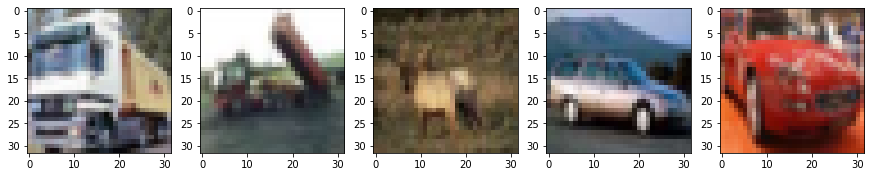

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
ax1.imshow(X_train[1])
ax2.imshow(X_train[2])
ax3.imshow(X_train[3])
ax4.imshow(X_train[4])
ax5.imshow(X_train[5])
plt.show()

Naši podatki so večinoma vredu in jih ne potrebujemo pretirano pre-procesirati. Kar bomo edino storili je, da jih normaliziramo.

Ker so vrednosti pixlov shranjene kot številke od 0 do 255 jih bomo preprosto delili s 255.

In [5]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

Dodatno bomo še one-hot encod-ali naše razrede in shranili število razredov, ker želimo toliko nevronov v naši zadnji plasti.

In [6]:
# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

---

## Model Creation

Ustvarimo sedaj naš model.

Keras ima veliko različnih načrtov za izdelavo modelov ampak med najbolj uporabljenimi je Sequential. Začeli bomo z njim in mu počasi dodajali eno in po eno plast.

In [7]:
model = keras.Sequential()

Prva plast, ki jo bomo dodali je Convolution layer z 32 različnimi filtri in velikostjo filtra 3x3. `Padding="same"` pove, da velikosti slik ne bomo spreminjali. Na koncu dodamo še activation layer.

In [8]:
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))

Nato bomo dodali Dropout Layer, ki nam pomaga preprečevati overfitting. Vrednost 0.2 pomeni, da tekom vsakega koraka treniranja ignoriramo random 20% inputov.

In [9]:
model.add(keras.layers.Dropout(0.2))

Nato dodamo še BatchNormalization Layer, ki normalizira inpute v naslednji layer.

In [10]:
model.add(keras.layers.BatchNormalization())

Dodajmo sedaj še en set plasti. Praksa je, da globje kot gremo bolj se veča število filtrov v našem Conv2D layer-ju. S tem omogočamo modelu učenje bolj kompleksnih representacij v slikah.

Dodatno tukaj dodajmo še MaxPooling2D layer vendar pazimo, da jih ne dodamo preveč, saj Pooling Layer odstrani informacije.

In [11]:
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

In [12]:
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

Predno preidemo iz naših convolitonal plasti v Dense plasti moramo uporabiti Flatten plast, ki zagotovi, da bodo inputi v obliki enodimenzionalnega vektorja.

In [13]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

Dodajmo sedaj našo Dense plast. Znotraj nje definiramo število nevronov in aktivacijko funkcijo. Spet dodajmo še Dropout in BatchNormalization.

In [14]:
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())


Naša zadnja plast bo napovedovala kateri objekt je na sliki. Število nevronov je kar število razredov in aktivacijska funkcija je *softmax*, ki bo predstavljala % gotovosti.

In [15]:
model.add(keras.layers.Dense(class_num, activation='softmax'))

Ko imamo model ustvarjen, ga moramo še *compil-at*. Tukaj izberemo še katero *loss function* bomo uporabili, kateri *optimizer* in katere metrike želimo spremljlati. Vzemimo najbolj splošne in najbolj uporabljene zadeve.

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                      

---

Še enkrat vse skupaj v eni celici:

In [18]:
'''
Koda je v CLEAN verziji
'''

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

---

## Traning the model

Sedaj lahko pričnemo s treniranjem našega modela.

In [19]:
numpy.random.seed(seed)

history = model.fit(X_train, y_train, epochs=25, batch_size=64)

# Save model
model.save("models/cifar_10.h5")

Epoch 1/25
  5/782 [..............................] - ETA: 3:36 - loss: 2.7549 - accuracy: 0.1250

KeyboardInterrupt: 

Na žalost nimamo časa, da bi čakali, da se model dokončno nauči. Bomo pa uporabili že streniran model.

In [20]:
# Load data
model2 = keras.models.load_model("models/cifar_10_25epoch.h5")
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 dropout_10 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

Dodatno lahko prikažemo potek učenja (če bi ga učili dlje časa).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()


Training history:
![Train history](images/cnn_train_history.webp)

In [21]:
# Model evaluation
scores = model2.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy: {scores[1]*100:.2f}f%")

313/313 [==============================] - 10s 31ms/step - loss: 0.5083 - accuracy: 0.8370
Accuracy: 83.70f%


Končni rezultat je kar dober. Kar bi nam sedaj preostalo je dodatno spreminjanje arhitekture našega modela in spreminjanje hiperparametrov v iskanju še boljšega modela.

---

Poglejmo si še predikcijo dejanske slike.

Da naredimo predikcijo moramo naši sliki dodati en dimension, ker drugače dobimo error.

In [ ]:
# Primer
np.expand_dims(X_test[0], axis=0).shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dict_ = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}


fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, ax in enumerate(axes):
    image = np.expand_dims(X_test[i], axis=0)
    ax.imshow(X_test[i])
    real_value = np.argmax(y_test[i])
    prediction = np.argmax(model2.predict(image))
    
    ax.set_xlabel(f"Prediction: {dict_[prediction]}")
    ax.set_title(f"Real: {dict_[real_value]}")

plt.show()

Naslednji bolj napredni model, ki si ga bomo pogledali, je Recurrent Neural Network.

# Recurrent Neural Network

S pomočjo Recurrent Neural Network-a lahko naš model generira besedila. Naš model se bo učil na Harry Potter knjigah in nato generiral tekst glede na začetno besedilo katerega mu bomo mi podali.

Posplošeno povedano, RNN - Recurrent Neural Network, procesira zaporedja, kot so cene delnic, stavki ali zaporedne meritve, po en element naenkrat. Hkrati pa ohranja spomin zaporedja.

Recurrent pomeni, da trenutni izhod postane del vhoda pri naslednjem koraku.

![RNN](images/rnn.png)

Ta spomin omogoča modelu, da se nauči daljših odvisnosti kar pomeni, da lahko pri napovedovanju upošteva celoten kontekst, naj bo to naslednja beseda v stavku, *sentement analysis* ali naslednja meritev temperature.

Za primer vzemimo sledeči stavek:
>The concert was boring for the first 15 minutes while the band warmed up but then was terribly exciting.

Model kateri upošteva samo besede, ne pa tudi kontekst, bi po vsej verjetnosti napovedal, da ima stavek negativni pomen. RNN pa bi moral biti sposoben razumeti besede kot so *but* in *terribly exciting* in videti, da to spremeni pomen stavka iz negativnega v pozitivnega. 

Glavna komponenta RNN modela je plast, ki implementira spomin. Med najbolj uporabljenimi in popularnimi je LSTM (Long Short-Term Memory) plast. Na kratko povedano, LSTM ima *input gate* za trenutno vhodno informacijo, *forget gate*, ki odvrže irelevantne informacije in *output gate*, ki predstavlja izhodno informacjo.

![anatomy_of_lstm](images/anatomy_of_lstm.png)

## Problem Formulation

Za naše namene bomo RNN uporabljali tako, da bomo napovedovali naslednjo besedo, ki naj bi se pojavila.

Ko bomo natrenirali naš model bomo vanj poslali začetno besedilo in pridobili naslednjo besedo. S to besedo bomo nato posodobili naše začetno besedilo in ga ponovn poslali v naš model in pridobili naslednjo besedo.

## Data Preparation

Kot naše podatke bomo uporabili Harry Potter knjige. Vzeli bomo le prvo knjigo (ker moj računalnik ne zdrži večjih tekstov).

[GitHub repo](https://github.com/formcept/whiteboard/tree/master/nbviewer/notebooks/data/harrypotter)

In [ ]:
text = ""
with open("data/Book 1 - The Philosopher's Stone.txt") as f:
    for line in f.readlines()[:]:
        text = text + line.replace("\n", "")

text = [text] # if it is just a long string it will encode each character
print(text[0][:50])

Naš tekst bomo sedaj *tokanizirali* - besede bomo pretvorili v številčne vrednosti. Za to bomo uporabili *Tokanizer* class v **keras** knjižnjici

Tokanizer se znebi vseh ločil in vse črke spremeni v male črke. Nato pretvori vsako besedo v številčno vrednost. Če želimo ohraniti ločila lahko uporabimo drugačen **filters** parameter.

Katera številka predstavlja katero vrednost lahko vidimo znotraj **.word_index** dictionary-ja.

In [ ]:
from keras.preprocessing.text import Tokenizer
tokanizer = Tokenizer(filters='!"$#%&()*+,-./:;<=>?@[\\]^_`{|}\t\n', lower=True, split=" ")
tokanizer.fit_on_texts(text)
for i, key in enumerate(tokanizer.word_index.keys()):
    if i > 5:
        break
    print(key, "\t", tokanizer.word_index[key])

S pomočjo metode **texts_to_sequences(text)** bomo sedaj spremenili naše tekst besedilo v številčno sekvenco.

In [ ]:
sequence = tokanizer.texts_to_sequences(text)
sequence[0][:10]

Da številke pretvorimo nazaj uporabimo **.index_word** dictionary.

In [ ]:
# Mapping of indexes to words
idx_word = tokanizer.index_word

" ".join(idx_word[w] for w in sequence[0][:51])

In [ ]:
# Mapping of indexes to words
idx_word = tokanizer.index_word
word_idx = tokanizer.word_index
print(len(idx_word))
print(len(word_idx))

## Features and Labels

Naslednji korak je, da ustvarimo naš nabor *features* in *labels*. V našem primeru bomo vzeli 50 besed (naši *features*) in nato naš model trenirali, da napove naslednjo 51. besedo (naš *label*).

Da ustvarimo naše labels in features bomo sedaj uporabili prvih 50 besed in napovedali naslednjo. Nato bomo vzeli besede od 1 do 51 in napovedovali 52, in tako dalje.

In [ ]:
import numpy as np
features = []
labels = []

training_length = 50

seq = sequence[0]
for i in range(training_length, len(seq)):
    # Extract the features and label
    extract = seq[i - training_length:i + 1]

    # Set the features and label
    features.append(extract[:-1])
    labels.append(extract[-1])
        
features = np.array(features)
features.shape

Sedaj imamo okoli 850'000 "podatkov" s katerimi bomo učili naš model.

Nato bomo še *one-hot encoded* naše labels.

In [ ]:
# Number of words ni vocabulary
num_words = len(idx_word) + 1

# Empty array to hold labels
label_array = np.zeros((len(features), num_words))

# One hot encode the labels
for example_index, word_index in enumerate(labels):
    label_array[example_index, word_index] = 1
label_array.shape

Naš prvi input in out sta sedaj:

In [ ]:
print("Naš INPUT")
" ".join([idx_word[i] for i in features[0]])

In [ ]:
print("Naš OUTPUT")
idx_word[np.argmax(label_array[0])]

Za konec bomo naše podatke še razdelili na *training* in pa *validating* set. Uporabili bomo tudi **shuffle** funkcijo, da se bodo podatki premešali in ne bodo v točnem zaporedju knjige.

In [ ]:
from sklearn.utils import shuffle

def create_train_valid(features,
                       labels,
                       num_words,
                       train_fraction=0.75,
                       RANDOM_STATE = 123):
    """Create training and validation features and labels."""
    
    # Randomly shuffle features and labels
    features, labels = shuffle(features, labels, random_state=RANDOM_STATE)

    # Decide on number of samples for training
    train_end = int(train_fraction * len(labels))

    train_features = np.array(features[:train_end])
    valid_features = np.array(features[train_end:])

    train_labels = labels[:train_end]
    valid_labels = labels[train_end:]

    # Convert to arrays
    X_train, X_valid = np.array(train_features), np.array(valid_features)

    # Using int8 for memory savings
    y_train = np.zeros((len(train_labels), num_words), dtype=np.int8)
    y_valid = np.zeros((len(valid_labels), num_words), dtype=np.int8)

    # One hot encoding of labels
    for example_index, word_index in enumerate(train_labels):
        y_train[example_index, word_index] = 1

    for example_index, word_index in enumerate(valid_labels):
        y_valid[example_index, word_index] = 1
    
    # Memory management
    import gc
    gc.enable()
    del features, labels, train_features, valid_features, train_labels, valid_labels
    gc.collect()

    return X_train, X_valid, y_train, y_valid



X_train, X_valid, y_train, y_valid = create_train_valid(features, labels, num_words)
X_valid.shape, y_valid.shape

## Building RNN

Naš model bomo zgradili s pomočjo **Keras** knjižnjice, ki deluje na **Tensorflow** knjižnjici.

Uporabili bomo **Sequential** model, kar pomeni, da plasti dodajamo eno in po eno.

* Embedding - nam mapira besede v 100dimenzionalni vektor. Pozicija besede v tem vektorskem prostoru je njen *embedding*. Embeding Layer lahko tudi treniramo in tako izboljsamo relacije med besedami, lahko pa ga pustimo pri miru (ker moj računalnik ne zmore vsega tega).
* Masking - je način kako našemu RNN povemo, če kakšne besede manjkajo naj jih izpusti. Če treniramo naš embedding layer potem Maskinga ne uporabljamo. V nasprotnem primeru pa ja.
* LSTM - Plast, ki skrbi za ohranjanje spomina


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# EMbedding layer
model.add(Embedding(input_dim=num_words,
                     input_length = training_length,
                     output_dim=100,
                     trainable=True, #False
                     #mask_zero=True
                   ))

# Masking layer for pre-trained embeddings
#model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation="relu"))

#Droput for regularization
model.add(Dropout(0.5))

#Output layer
model.add(Dense(num_words, activation="softmax"))

#compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print(model.summary())

## Training the model

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint('models/harry_potter.h5', save_best_only=True, save_weights_only=False)]

In [ ]:
history = model.fit(X_train,  y_train, 
                    batch_size=64,#2048, 
                    epochs=55,#150,
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

In [ ]:
model.save("models/hp_save.h5")

In [ ]:
model2 = load_model("models/harry_potter_best.h5")
model2.summary()

## Text generation

In [ ]:
import random
seed_length=50
diversity=1

seed = sequence[0][:50]
print(" ".join([idx_word[x] for x in seed]))
print("---->")
for i in range(30):
    seed = sequence[0][i:50+i]
    # Make a prediction from the seed
    preds = model.predict(np.array(seed).reshape(1, -1))[0].astype(np.float64)
    predictions = preds.argsort()[-10:][::-1]

    index_ = random.choice(predictions) # np.argmax(preds)# če je sam argmax ponavad vn dobiš sam the the the

    print(idx_word[index_], end=" ")
    

Vidimo, da je naš model dokaj neuspešen.

Da bi model izbojšali bi lahko uporabili tekste vseh knjig in podaljšali čas učenja. (vendar moj računalnik ni dovolj zmogljiv).

Lahko pa uporabimo že natrenirane modele.

# GPT-2 and GPT-J Text Generation

V smeri generiranja texta so bili večji premiki, ko je OpenAI izdal članek o [GPT-2](https://openai.com/blog/gpt-2-1-5b-release/) modelu. Učen je bil na okoli 40GB texta oziroma teksta iz 8milijon random spletnih strani. Njegov namen je bil preprosto napovedati naslednjo besedo.

Naslednji večji premik je bil, ko je OpenAI objavil [GPT-3 članek](https://arxiv.org/abs/2005.14165). Na žalost pa niso javno objavili modelovih uteži in tako ne moremo sami uporabiti njihovega modela.

So pa se pojavili modeli, ki se po sposobnosti približajo GPT-3 in imajo javne uteži. Tak model bomo uporabili tudi mi.



V naši nalogi bomo uporabili [GPT-J model](https://arankomatsuzaki.wordpress.com/2021/06/04/gpt-j/), katerega so ustvarili pri ElutherAI. Model ima 6 miljard parametrov, 28 plasti z 4096 dimenzijami.

Učen je bil na [The Pile dataset](https://arxiv.org/abs/2101.00027), ki je velik 825GB, vsebuje 22 pod-datasetov, ki vključujejo celotno angleško Wikipedijo, GitHub, Stack Exchange, ArXiv in še več.

V spodnji tabelici lahko vidimo kakšne modele lahko s pomočjo knjižnjice uporabljamo:

<table style="border-collapse: collapse; width: 55.8987%; height: 107px; margin-left: auto; margin-right: auto;" border="1">
<tbody>
<tr style="height: 18px;">
<td style="width: 39.1738%; text-align: center; height: 18px;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">Model</span></td>
<td style="width: 30.6178%; height: 18px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">Number of Parameters</span></td>
<td style="width: 21.5188%; height: 18px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">Size</span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; height: 18px; text-align: center;"><strong><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">gpt2</span></code></span></strong></td>
<td style="width: 30.6178%; height: 18px; text-align: center;"><strong><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">124M</span></strong></td>
<td style="width: 21.5188%; height: 18px; text-align: center;"><span style="font-family: 'andale mono', monospace;"><strong><span style="font-size: 12pt;">523MB</span></strong></span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; height: 18px; text-align: center;"><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-neo-125M</span></code></span></td>
<td style="width: 30.6178%; height: 18px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">125M</span></td>
<td style="width: 21.5188%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace; font-size: 12pt;">502MB</span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-neo-1.3B</span></code></span></td>
<td style="width: 30.6178%; text-align: center; height: 18px;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">1.3B</span></td>
<td style="width: 21.5188%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace; font-size: 12pt;">4.95GB</span></td>
</tr>
<tr style="height: 17px;">
<td style="width: 39.1738%; height: 17px; text-align: center;"><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-neo-2.7B</span></code></span></td>
<td style="width: 30.6178%; height: 17px; text-align: center;"><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">2.7B</span></td>
<td style="width: 21.5188%; height: 17px; text-align: center;"><span style="font-family: 'andale mono', monospace; font-size: 12pt;">9.94GB</span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 39.1738%; text-align: center; height: 18px;"><strong><span style="font-family: 'andale mono', monospace;"><code><span style="font-size: 12pt;">EleutherAI/gpt-j-6B</span></code></span></strong></td>
<td style="width: 30.6178%; text-align: center; height: 18px;"><strong><span style="font-family: helvetica, arial, sans-serif; font-size: 12pt;">6B</span></strong></td>
<td style="width: 21.5188%; text-align: center; height: 18px;"><span style="font-family: 'andale mono', monospace;"><strong><span style="font-size: 12pt;">22.5GB</span></strong></span></td>
</tr>
</tbody>
</table>

## Installing library

Za začetek naložimo python knjižnjico:

```python
$ pip install transformers
```

## Uporaba knjižnjice

(Da zdownloada GPT2 model tud traja neki cajta...). Na Ubuntu se zadeve shranijo v `~/.cache/huggingface/transformers/`.

https://huggingface.co/docs/datasets/v1.12.0/cache.html

In [ ]:
from transformers import pipeline
# download & load GPT-2 model
gpt2_generator = pipeline('text-generation', model='gpt2')

Prvo uporabimo GPT-2 model, da zgeneriramo 3 različne stavke iz top 50 kandidatov.

S pomočjo parametra **top_k** povemo, da želimo izbirati izmed 50 najbolj primernih besed. S parametrom **temperature** pa definiramo kako greedy želimo biti pri izbiranju besed. Vrednost 0 pomeni, da želimo vzeti najbolj primerno besedo, vendar to lahko hitro privede do ponavljanja.

S prametrom **max_length** določimo končno dolžino našega teksta.

In [ ]:
prompt = "Harry wandered over to the Restricted Section. He had been wondering for a while if"
sentences = gpt2_generator(prompt, 
                           do_sample=True, 
                           top_k=50, 
                           temperature=0.6, 
                           max_length=50, 
                           num_return_sequences=3)
for sentence in sentences:
    print(sentence["generated_text"])
    print("="*50)

In [ ]:
# download & load GPT-J model! It's 22.5GB in size
generator = pipeline('text-generation', model='EleutherAI/gpt-neo-125M')

In [ ]:
# generate sentences with TOP-K sampling
sentences = generator("To be honest, robots will", do_sample=True, top_k=100, temperature=0.8, max_length=50, num_return_sequences=3)
for sentence in sentences:
    print(sentence["generated_text"])
    print("="*50)

Ker je bil model streniran na The Pile datasetu lahko generira več kot samo angleška besedila:

In [ ]:
# generate Python Code!
print(generator(
"""
import os
# make a list of all african countries
""",
    do_sample=True, top_k=10, temperature=0.05, max_length=256)[0]["generated_text"])

In [ ]:
# generate Python Code!
print(generator(
"""
import datetime
# make a list of all holiday datetimes
""",
    do_sample=True, top_k=10, temperature=0.05, max_length=256)[0]["generated_text"])

https://6b.eleuther.ai/ - online prompt za GPT-J